In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Univariate analysis

In [ ]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


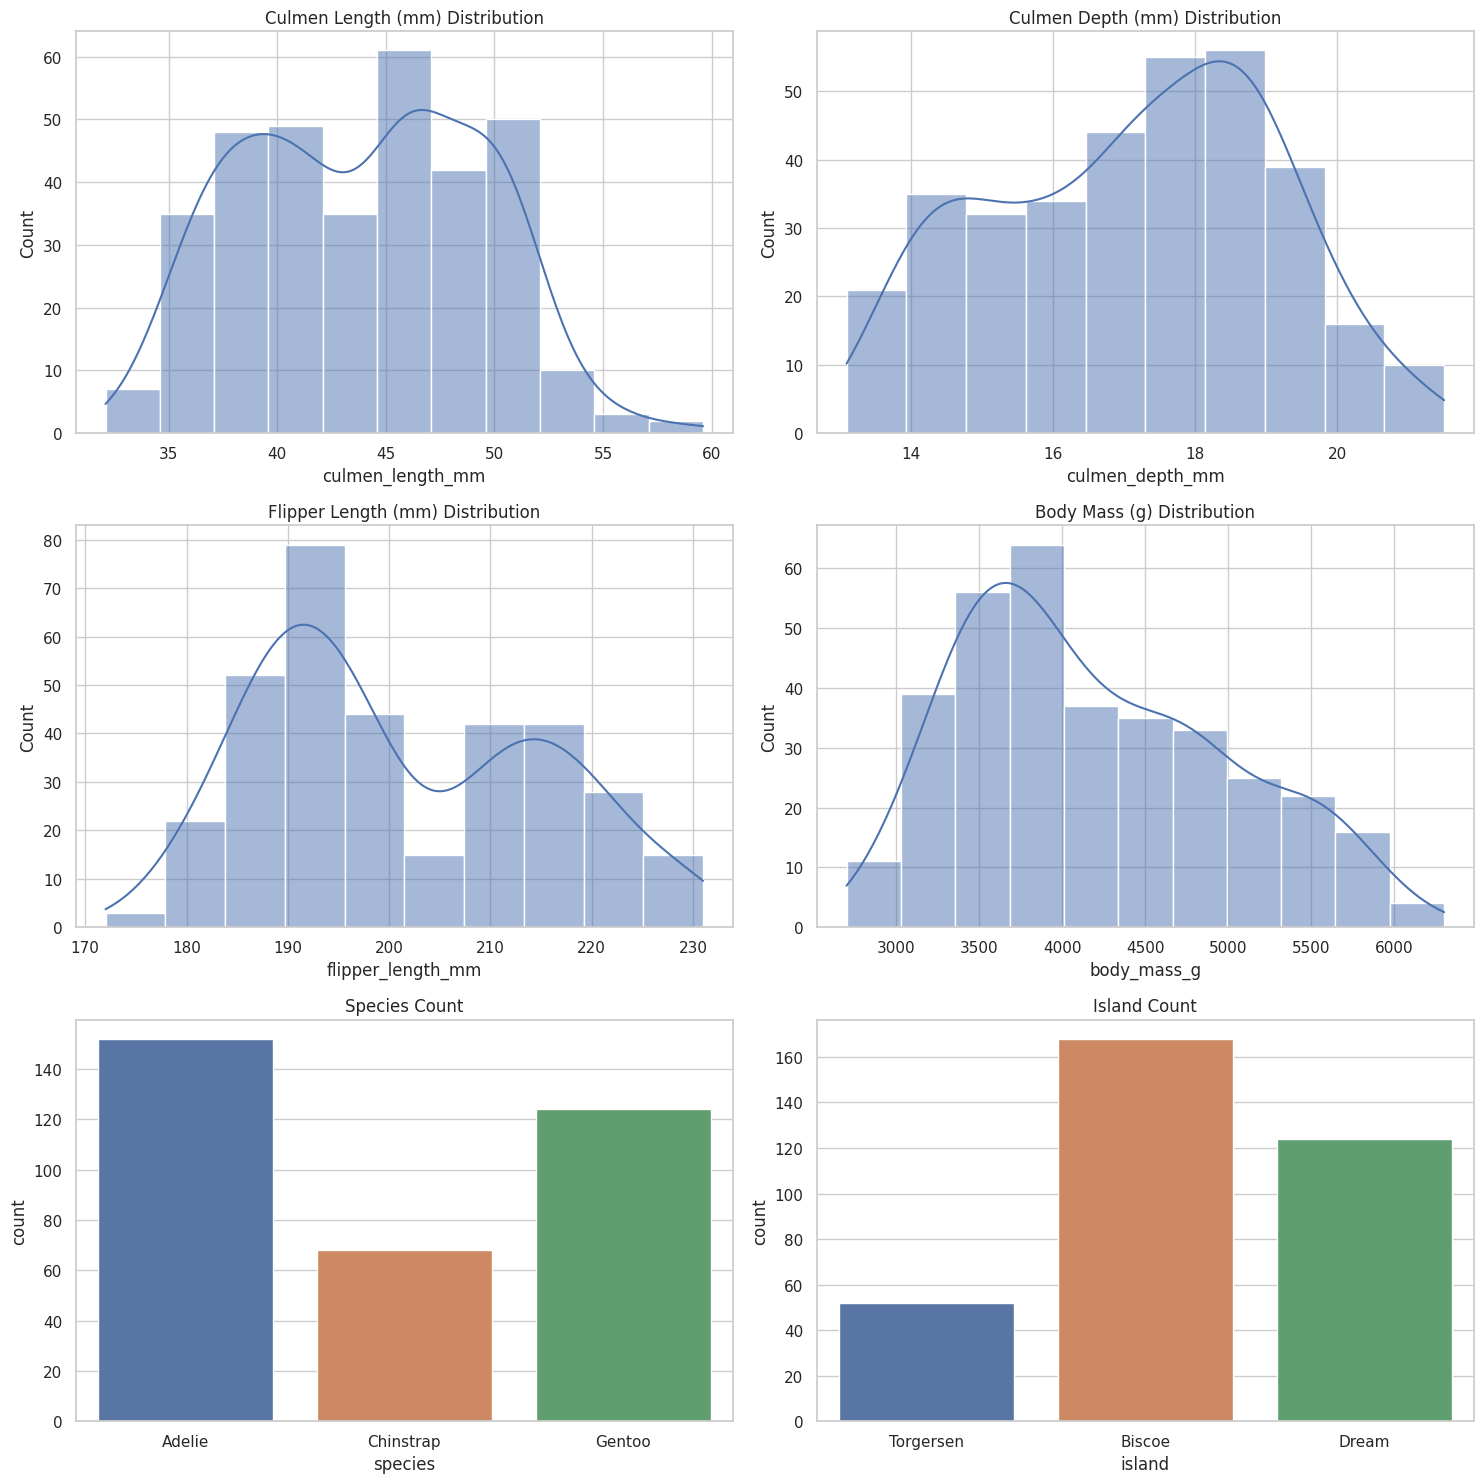

In [ ]:
sns.set(style="whitegrid")

# Plotting multiple univariate plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Univariate analysis for culmen_length_mm
sns.histplot(df['culmen_length_mm'], ax=axes[0, 0], kde=True).set(title='Culmen Length (mm) Distribution')

# Univariate analysis for culmen_depth_mm
sns.histplot(df['culmen_depth_mm'], ax=axes[0, 1], kde=True).set(title='Culmen Depth (mm) Distribution')

# Univariate analysis for flipper_length_mm
sns.histplot(df['flipper_length_mm'], ax=axes[1, 0], kde=True).set(title='Flipper Length (mm) Distribution')

# Univariate analysis for body_mass_g
sns.histplot(df['body_mass_g'], ax=axes[1, 1], kde=True).set(title='Body Mass (g) Distribution')

# Univariate analysis for species
sns.countplot(x='species', data=df, ax=axes[2, 0]).set(title='Species Count')

# Univariate analysis for island
sns.countplot(x='island', data=df, ax=axes[2, 1]).set(title='Island Count')

plt.tight_layout()
plt.show()

Bivariate analysis

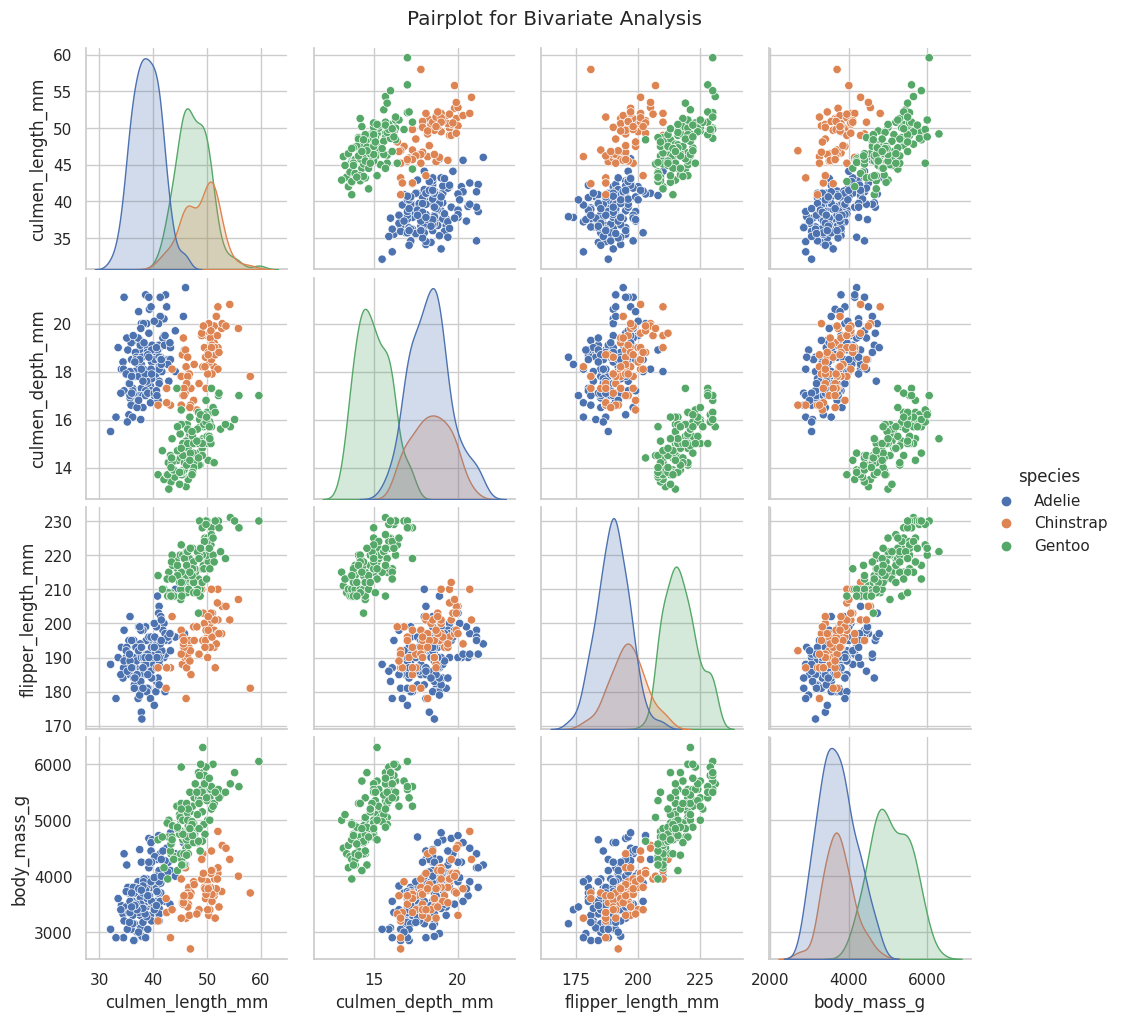

In [ ]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pairplot for Bivariate Analysis', y=1.02)
plt.show()

multi-variate

<ipython-input-31-7f48d07d051d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


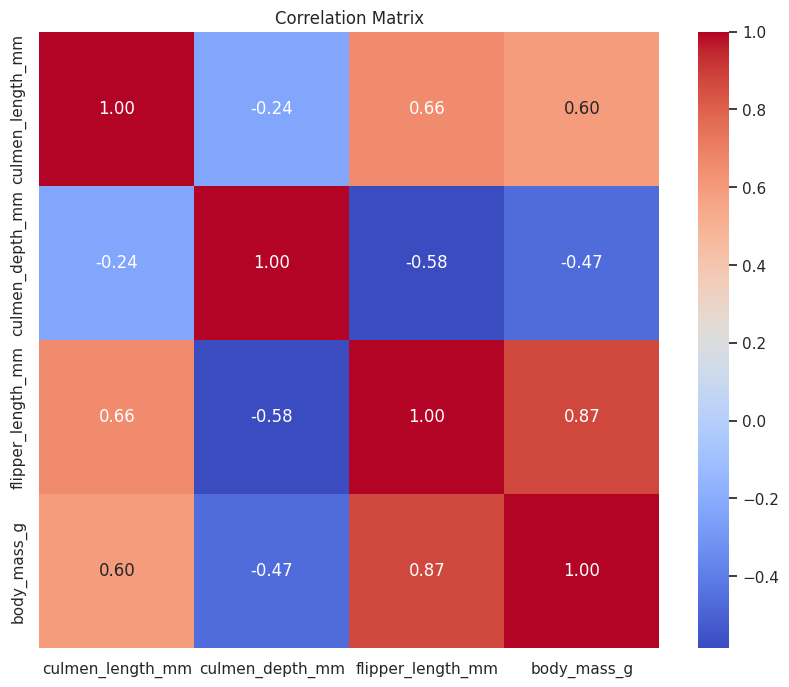

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
imputer = SimpleImputer(strategy='mean')
df_imputed = df.copy()
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [ ]:
categorical_cols = ['species', 'island', 'sex']
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['culmen_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['culmen_depth_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['flipper_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['body_mass_g'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['culmen_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['culmen_depth_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['flipper_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['body_mass_g'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['culmen_length_mm', 'culmen_depth_mm'], ['culmen_depth_mm', 'flipper_length_mm'], ['flipper_length_mm', 'body_mass_g']]], **{})
chart

Outliers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,2
1,0,2,39.50000,17.40000,186.000000,3800.000000,1
2,0,2,40.30000,18.00000,195.000000,3250.000000,1
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,1


Checking the correlation of independent variables with the target

In [ ]:
df.corr().species.sort_values()

culmen_depth_mm     -0.741335
island              -0.635659
sex                 -0.003823
culmen_length_mm     0.728674
body_mass_g          0.747726
flipper_length_mm    0.851160
species              1.000000
Name: species, dtype: float64

Spliting the data into dependent and independent variables

In [ ]:
X=df.drop(columns=['species'],axis=1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,2
1,2,39.50000,17.40000,186.000000,3800.000000,1
2,2,40.30000,18.00000,195.000000,3250.000000,1
3,2,43.92193,17.15117,200.915205,4201.754386,2
4,2,36.70000,19.30000,193.000000,3450.000000,1


In [ ]:
Y=df['species']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scle = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scle.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.429888,0.482282,0.490088,0.417154,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scle,Y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape )

(275, 6) (275,) (69, 6) (69,)
